In [19]:
# importar pandas e tabelas
import pandas as pd
df = pd.read_csv('/content/merged.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       36000 non-null  int64  
 1   age                                           36000 non-null  int64  
 2   sex                                           36000 non-null  object 
 3   last_month_salary_median                      36000 non-null  int64  
 4   number_dependents_median                      36000 non-null  int64  
 5   total_loan                                    35575 non-null  float64
 6   clean_loan_type                               35575 non-null  object 
 7   more_90_days_overdue                          36000 non-null  int64  
 8   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64  
 9   number_times_delayed_payment_loan_60_89_days  36000 non-null 

In [19]:
df

,user_id,age,sex,last_month_salary_median,number_dependents_median,total_loan,clean_loan_type,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,using_lines_not_secured_personal_assets,debt_ratio,default_flag
0,24483,21,M,5400,0,NaN,NaN,98,98,98,1.000000,0.000000,0
1,14999,21,F,0,0,NaN,NaN,0,0,0,1.000000,0.000000,0
2,18876,21,F,5400,0,NaN,NaN,0,0,0,1.000000,307.000000,0
3,28122,21,M,5400,0,NaN,NaN,0,0,0,1.000000,8.000000,0
4,865,21,M,867,0,NaN,NaN,98,98,98,1.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,1042,54,M,9166,0,40.0,Other,0,0,1,0.055270,0.198538,0
35996,30141,80,F,10500,0,42.0,Other,0,2,0,0.020546,0.012570,0
35997,30040,57,M,5000,0,43.0,Other,0,2,0,0.235719,0.563287,0
35998,23773,51,F,37500,0,48.0,Other,0,0,0,0.011694,0.010800,0


In [12]:
df.describe()

,user_id,age,last_month_salary_median,number_dependents_median,total_loan,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,using_lines_not_secured_personal_assets,debt_ratio,default_flag
count,36000.000000,36000.000000,3.600000e+04,36000.000000,35575.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,18000.500000,52.417417,6.420077e+03,0.738222,3.317048,0.260806,0.419278,0.237861,5.807040,351.580075,0.018972
std,10392.449182,14.791331,1.160474e+04,1.110608,3.484358,4.121365,4.144020,4.105515,223.407144,2011.635341,0.136429
min,1.000000,21.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.750000,41.000000,3.900000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.029526,0.176265,0.000000
50%,18000.500000,52.000000,5.400000e+03,0.000000,2.000000,0.000000,0.000000,0.000000,0.149655,0.366169,0.000000
75%,27000.250000,63.000000,7.416000e+03,1.000000,4.000000,0.000000,0.000000,0.000000,0.548529,0.873552,0.000000
max,36000.000000,109.000000,1.560100e+06,13.000000,52.000000,98.000000,98.000000,98.000000,22000.000000,307001.000000,1.000000


In [20]:
# Primeiro, lidar com valores nulos em clean_loan_type
df['clean_loan_type'].fillna('null', inplace=True)

# Criar variáveis dummy para sex e clean_loan_type sem excluir a primeira categoria
df = pd.get_dummies(df, columns=['clean_loan_type'], drop_first=False)

# Segmentar age em quartis e renomear intervalos
age_quartiles, age_bins = pd.qcut(df['age'], 4, retbins=True)
age_labels = [f'{int(low)}-{int(high)} anos' for low, high in zip(age_bins[:-1], age_bins[1:])]
df['age_quartile'] = pd.qcut(df['age'], 4, labels=age_labels)

# Segmentar last_month_salary_median em quartis e renomear intervalos
salary_quartiles, salary_bins = pd.qcut(df['last_month_salary_median'], 4, retbins=True)
salary_labels = [f'{int(low)}-{int(high)}' for low, high in zip(salary_bins[:-1], salary_bins[1:])]
df['salary_quartile'] = pd.qcut(df['last_month_salary_median'], 4, labels=salary_labels)

# Criar variáveis dummy para os quartis de age e last_month_salary_median
df = pd.get_dummies(df, columns=['age_quartile'], prefix='age')
df = pd.get_dummies(df, columns=['salary_quartile'], prefix='salary')

# Incluir a coluna 'sex' no DataFrame
# Isso irá criar duas colunas dummy: 'sex_F' e 'sex_M'
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')], axis=1)

# Transformar as outras variáveis em binárias (1 se maior que 0, 0 caso contrário)
# Excluindo a coluna 'default_flag'
columns_to_binary = ['number_dependents_median', 'total_loan', 'more_90_days_overdue',
                     'number_times_delayed_payment_loan_30_59_days',
                     'number_times_delayed_payment_loan_60_89_days',
                     'using_lines_not_secured_personal_assets', 'debt_ratio']

for col in columns_to_binary:
    df[col] = (df[col] > 0).astype(int)

# Converter as colunas dummy para inteiros (0 e 1)
dummy_columns = df.select_dtypes(include=['bool']).columns
df[dummy_columns] = df[dummy_columns].astype(int)

# Verificar o resultado final
print(df.head())
print(df.info())

   user_id  age sex  last_month_salary_median  number_dependents_median  \
0    24483   21   M                      5400                         0   
1    14999   21   F                         0                         0   
2    18876   21   F                      5400                         0   
3    28122   21   M                      5400                         0   
4      865   21   M                       867                         0   

   total_loan  more_90_days_overdue  \
0           0                     1   
1           0                     0   
2           0                     0   
3           0                     0   
4           0                     1   

   number_times_delayed_payment_loan_30_59_days  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

   numb

In [21]:
# Segmentar age em cuartiles e nome intervalos
age_quartiles, age_bins = pd.qcut(df['age'], 4, retbins=True)
age_labels = [f'{int(low)}-{int(high)} anos' for low, high in zip(age_bins[:-1], age_bins[1:])]
df['age_quartile'] = pd.qcut(df['age'], 4, labels=age_labels)

# Segmentar last_month_salary_median em quartiles e nome do intervalos
salary_quartiles, salary_bins = pd.qcut(df['last_month_salary_median'], 4, retbins=True)
salary_labels = [f'{int(low)}-{int(high)}' for low, high in zip(salary_bins[:-1], salary_bins[1:])]
df['salary_quartile'] = pd.qcut(df['last_month_salary_median'], 4, labels=salary_labels)

# Eliminar las columnas age y last_month_salary_median
df.drop(columns=['age', 'last_month_salary_median'], inplace=True)

# Mostrar os límites do quartiles para verificar
print("Límites de los cuartiles de edad:", age_bins)
print("Límites de los cuartiles de salario:", salary_bins)

# Mostrar as primeiras filas do DataFrame
df.head()
df.info()

Límites de los cuartiles de edad: [ 21.  41.  52.  63. 109.]
Límites de los cuartiles de salario: [      0.    3900.    5400.    7416. 1560100.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   user_id                                       36000 non-null  int64   
 1   sex                                           36000 non-null  object  
 2   number_dependents_median                      36000 non-null  int64   
 3   total_loan                                    36000 non-null  int64   
 4   more_90_days_overdue                          36000 non-null  int64   
 5   number_times_delayed_payment_loan_30_59_days  36000 non-null  int64   
 6   number_times_delayed_payment_loan_60_89_days  36000 non-null  int64   
 7   using_lines_not_secured_personal_assets       36000 non-n

In [22]:
import numpy as np

# Selessao as colunas numéricas, excluindo 'user_id' e as colunas categóricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('user_id')

# Calcular el riesco relativo para cada variavel numérica em relacao com 'default_flag'
risk_ratios = {}
for column in numeric_columns:
    # Calcular o riesco medio para cada grupo
    group_means = df.groupby('default_flag')[column].mean()
    risk_ratio = group_means[1] / group_means[0]  # Riesgo relativo
    risk_ratios[column] = risk_ratio

# Convertir los resultados a um DataFrame para una mejor visualización
risk_ratios_df = pd.DataFrame.from_dict(risk_ratios, orient='index', columns=['Riesgo Relativo'])

# Ordenar o DataFrame de maior a menor
risk_ratios_df = risk_ratios_df.sort_values(by='Riesgo Relativo', ascending=False)

#imprime
print(risk_ratios_df)

                                              Riesgo Relativo
default_flag                                              inf
more_90_days_overdue                                24.580225
number_times_delayed_payment_loan_60_89_days        20.800091
clean_loan_type_null                                 8.665459
number_times_delayed_payment_loan_30_59_days         6.107946
age_21-41 anos                                       1.834937
salary_0-3900                                        1.586845
clean_loan_type_Other                                1.325966
number_dependents_median                             1.258172
age_41-52 anos                                       1.173028
sex_F                                                1.070238
using_lines_not_secured_personal_assets              1.068308
salary_3900-5400                                     1.029236
debt_ratio                                           0.977849
sex_M                                                0.953278
salary_5

<ipython-input-22-c6da1abb6cae>:12: RuntimeWarning: divide by zero encountered in scalar divide
  risk_ratio = group_means[1] / group_means[0]  # Riesgo relativo


In [23]:
# Seleccionar las columnas numéricas, excluyendo 'user_id'
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('user_id')

# Crear la columna 'pontuacao' como la suma de todas las columnas numéricas
df['pontuacao'] = df[numeric_columns].sum(axis=1)

# Crear la columna 'score' como 1 si 'pontuacao' es mayor o igual a 7, y 0 en caso contrario
df['score'] = (df['pontuacao'] >= 9).astype(int)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Verificar la distribución de la columna 'score'
print(df['score'].value_counts())
df.info()


   user_id sex  number_dependents_median  total_loan  more_90_days_overdue  \
0    24483   M                         0           0                     1   
1    14999   F                         0           0                     0   
2    18876   F                         0           0                     0   
3    28122   M                         0           0                     0   
4      865   M                         0           0                     1   

   number_times_delayed_payment_loan_30_59_days  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

   number_times_delayed_payment_loan_60_89_days  \
0                                             1   
1                                             0   
2                                             0   
3                   

                                         Feature  Coefficient
0                                          sex_F     0.064975
1                                          sex_M    -0.065468
2                            salary_7416-1560100    -0.537141
3                               salary_5400-7416     0.270186
4                               salary_3900-5400     0.059757
5                                  salary_0-3900     0.206704
6                                age_63-109 anos    -0.525203
7                                 age_52-63 anos    -0.246836
8                                 age_41-52 anos     0.171256
9                                 age_21-41 anos     0.600290
10                          clean_loan_type_null     0.308552
11                   clean_loan_type_Real Estate    -0.341745
12                         clean_loan_type_Other     0.032699
13                                    debt_ratio     1.647329
14       using_lines_not_secured_personal_assets     1.346608
15  numb

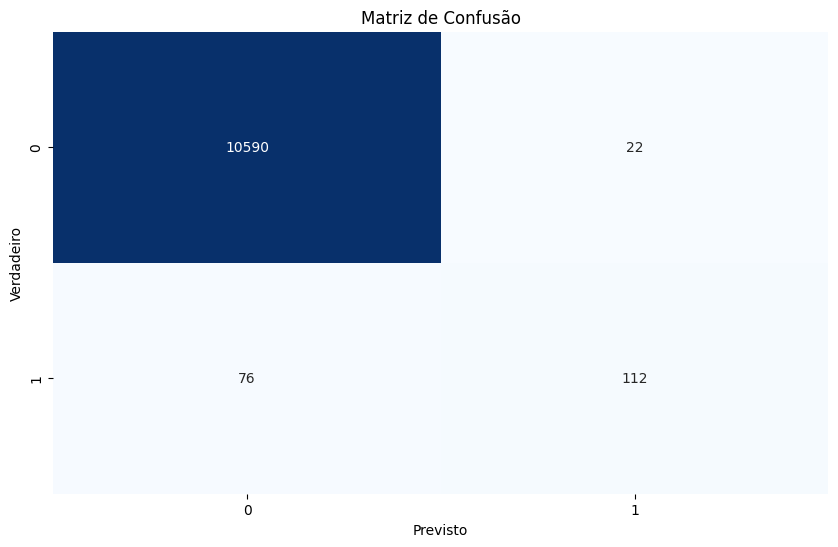

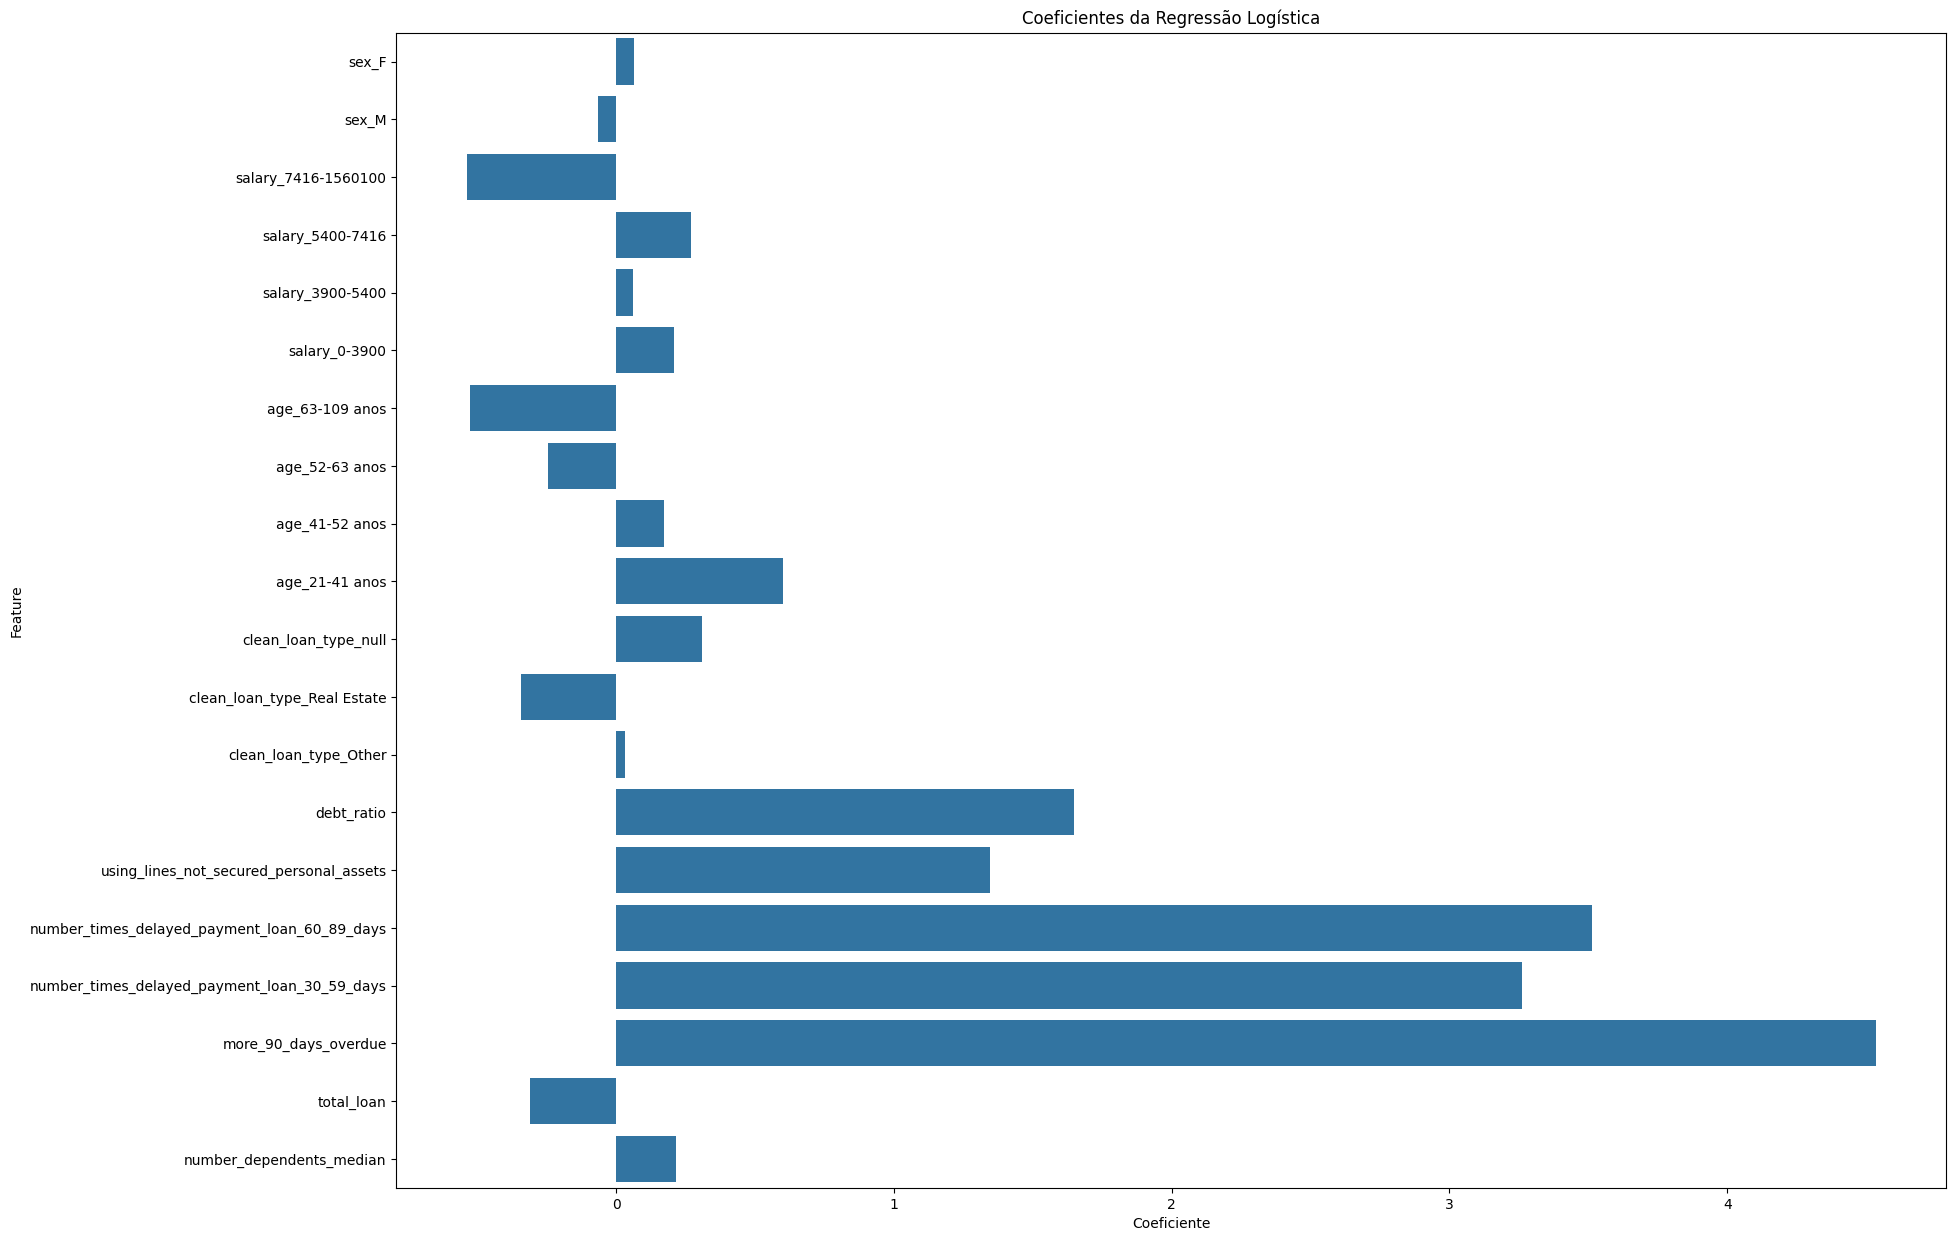

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando variáveis relevantes
features = ['sex_F', 'sex_M', 'salary_7416-1560100', 'salary_5400-7416', 'salary_3900-5400', 'salary_0-3900', 'age_63-109 anos', 'age_52-63 anos',
            'age_41-52 anos', 'age_21-41 anos', 'clean_loan_type_null', 'clean_loan_type_Real Estate', 'clean_loan_type_Other', 'debt_ratio', 'using_lines_not_secured_personal_assets',
            'number_times_delayed_payment_loan_60_89_days', 'number_times_delayed_payment_loan_30_59_days', 'more_90_days_overdue', 'total_loan', 'number_dependents_median']
target = 'default_flag'

# Criando o dataframe de treino e teste
X = df[features]
y = df[target]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Coeficientes do modelo
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
print(coefficients)

# Avaliando o modelo
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Heatmap da matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Gráfico de coeficientes
plt.figure(figsize=(20, 15))
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.title('Coeficientes da Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

                                         Feature  Coefficient
0                                          sex_F     0.035503
1                                          sex_M    -0.035503
2                            salary_7416-1560100    -0.245025
3                               salary_5400-7416     0.115129
4                               salary_3900-5400     0.043161
5                                  salary_0-3900     0.102252
6                                age_63-109 anos    -0.245875
7                                 age_52-63 anos    -0.119202
8                                 age_41-52 anos     0.077935
9                                 age_21-41 anos     0.278762
10                          clean_loan_type_null     0.059867
11                   clean_loan_type_Real Estate    -0.101747
12                         clean_loan_type_Other     0.088851
13                                    debt_ratio     0.407537
14       using_lines_not_secured_personal_assets     0.489973
15  numb

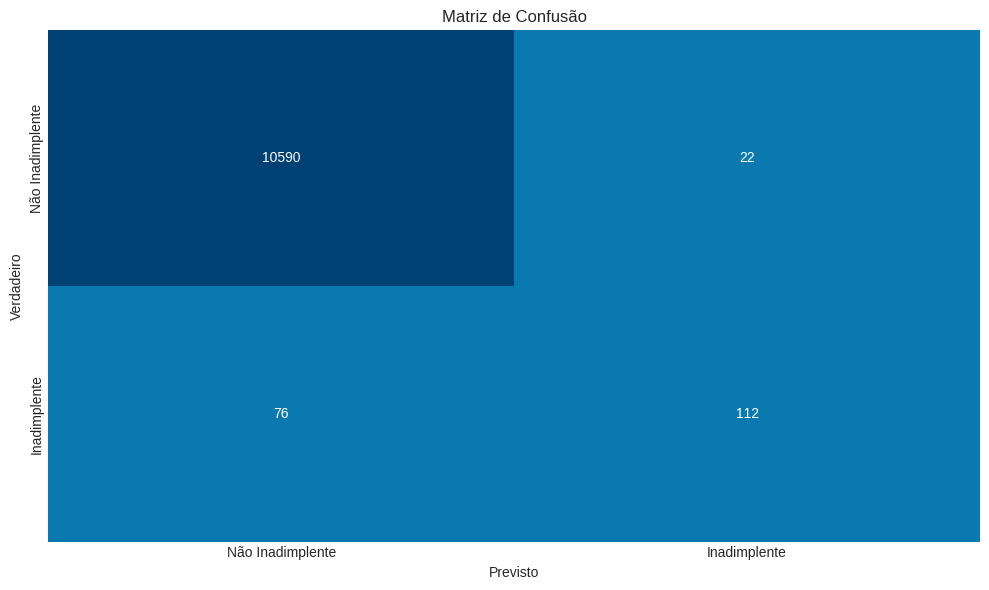

<ipython-input-47-8f99803f60c9>:93: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')  # Mudança de estilo para fundo azul celeste claro
<ipython-input-47-8f99803f60c9>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette=["#004173" if coef >= 0 else "#0979b0" for coef in coefficients['Coefficient']])


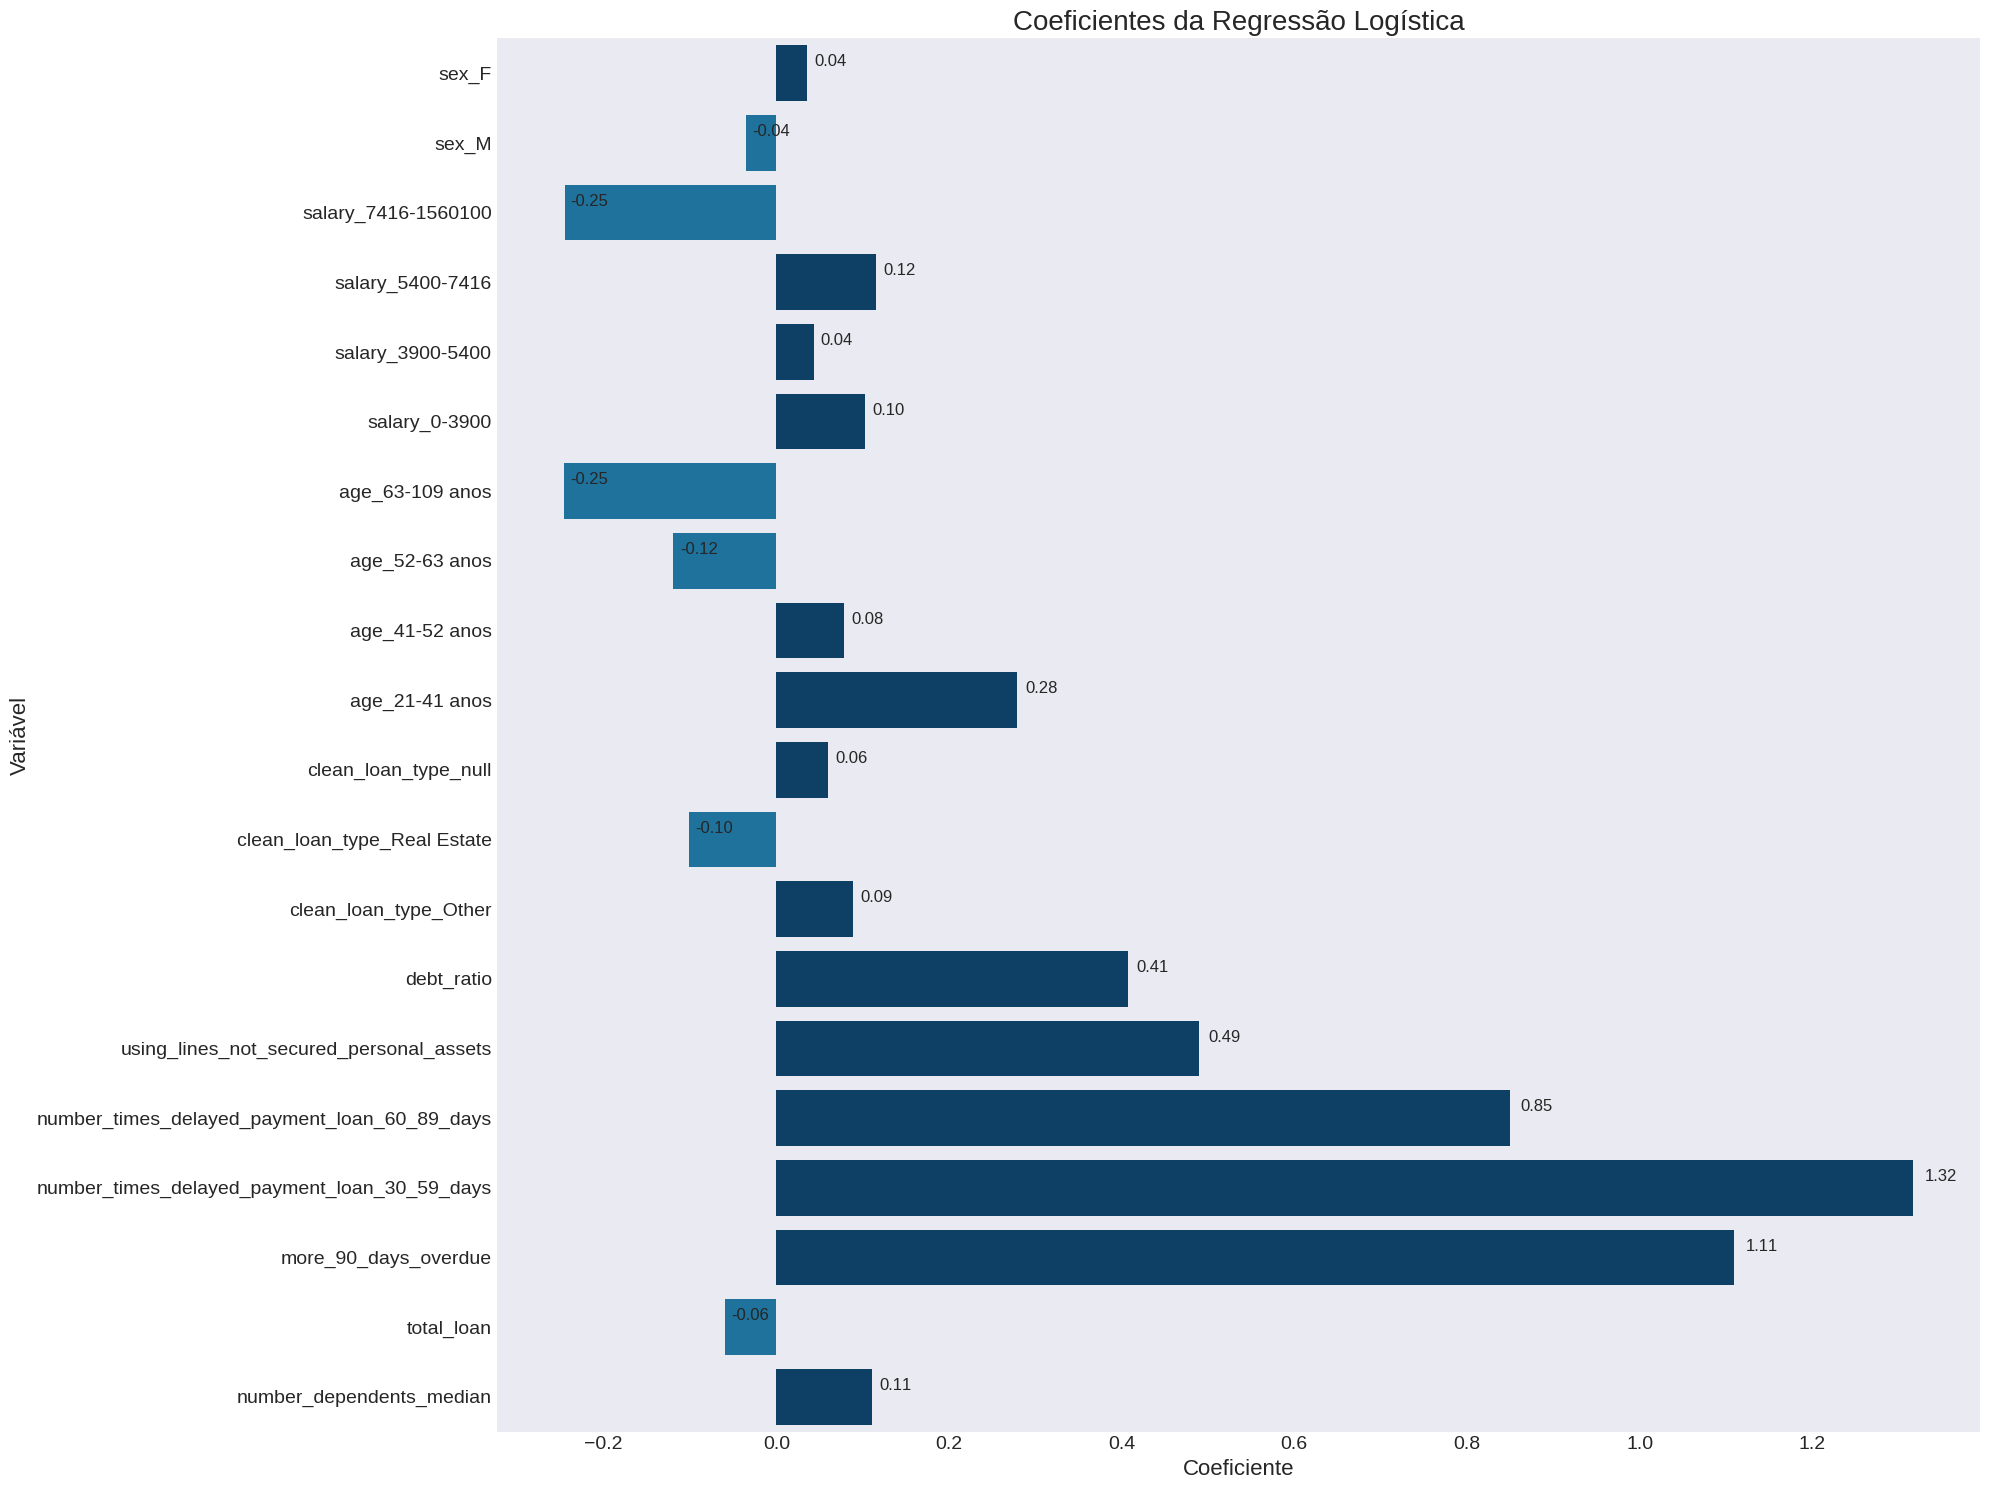

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Selecionando variáveis relevantes
features = ['sex_F', 'sex_M', 'salary_7416-1560100', 'salary_5400-7416', 'salary_3900-5400', 'salary_0-3900', 'age_63-109 anos', 'age_52-63 anos',
            'age_41-52 anos', 'age_21-41 anos', 'clean_loan_type_null', 'clean_loan_type_Real Estate', 'clean_loan_type_Other', 'debt_ratio', 'using_lines_not_secured_personal_assets',
            'number_times_delayed_payment_loan_60_89_days', 'number_times_delayed_payment_loan_30_59_days', 'more_90_days_overdue', 'total_loan', 'number_dependents_median']
target = 'default_flag'

# Criando o dataframe de treino e teste
X = df[features]
y = df[target]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando um pipeline com a normalização dos dados e o modelo de regressão logística
#pipeline = Pipeline([
 #   ('scaler', StandardScaler()),  # Normalização dos dados
  #  ('clf', LogisticRegression())  # Modelo de regressão logística
#])

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de regressão logística
model_df = LogisticRegression()
model_df.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = model_df.predict(X_test)

# Definindo os parâmetros a serem testados
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Realizando a busca em grade com validação cruzada
grid_search = GridSearchCV(model_df, parameters, scoring='f1')

# Ajustando o modelo aos dados
grid_search.fit(X_train, y_train)

# Coeficientes do modelo
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model_df.coef_[0]})
print(coefficients)

# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:")
print(best_params)

# Melhor pontuação na validação cruzada
best_score = grid_search.best_score_
print("\nMelhor pontuação na validação cruzada (F1-score): {:.2f}".format(best_score))

# Avaliando o desempenho do modelo no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Relatório de classificação e matriz de confusão
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

# Definindo as cores personalizadas
colors = ["#0979b0", "#004173"]  # Azul médio para Inadimplente, azul escuro para Não Inadimplente

# Configurações do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(colors), cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.xticks(ticks=[0.5, 1.5], labels=['Não Inadimplente', 'Inadimplente'])
plt.yticks(ticks=[0.5, 1.5], labels=['Não Inadimplente', 'Inadimplente'])
plt.tight_layout()  # Ajusta o layout para evitar que os rótulos se sobreponham

# Salvando a imagem
plt.savefig('confusao.png')
plt.show()

print('='*100)

# Definindo a cor de fundo
plt.figure(figsize=(20, 15))
plt.style.use('seaborn-dark')  # Mudança de estilo para fundo azul celeste claro
sns.set_palette(sns.color_palette(["#0979b0", "#004173"]))  # Paleta de cores azuis

# Plotando o gráfico de barras dos coeficientes
ax = sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette=["#004173" if coef >= 0 else "#0979b0" for coef in coefficients['Coefficient']])
plt.title('Coeficientes da Regressão Logística', fontsize=20)  # Ajusta o tamanho do título
plt.xlabel('Coeficiente', fontsize=16)  # Ajusta o tamanho da etiqueta do eixo x
plt.ylabel('Variável', fontsize=16)  # Ajusta o tamanho da etiqueta do eixo y
plt.xticks(fontsize=14)  # Ajusta o tamanho das etiquetas do eixo x
plt.yticks(fontsize=14)  # Ajusta o tamanho das etiquetas do eixo y

# Adicionando etiquetas acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', ((p.get_width() * 1.005), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points', fontsize=12)

plt.tight_layout()  # Ajusta o layout para evitar que as etiquetas se sobreponham

# Salvando a imagem
plt.savefig('coef.png')
plt.show()


In [29]:
# Seleccionar todas las columnas numéricas excepto 'user_id', 'pontuacao' y 'score'
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['user_id', 'pontuacao', 'score']]

# Calcular el riesgo relativo para cada columna numérica en relación con 'default_flag'
risk_ratios = {}
for column in numeric_columns:
    # Calcular el riesgo medio para cada grupo
    group_means = df.groupby('default_flag')[column].mean()
    risk_ratio = group_means[1] / group_means[0]  # Riesgo relativo
    risk_ratios[column] = risk_ratio

# Convertir los resultados del riesgo relativo a un DataFrame para una mejor visualización
risk_ratios_df = pd.DataFrame.from_dict(risk_ratios, orient='index', columns=['Riesgo Relativo'])

# Coeficientes del modelo
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model_df.coef_[0]})


# Combinar el DataFrame del riesgo relativo con los coeficientes del modelo
result_df = risk_ratios_df.merge(coefficients, left_index=True, right_on='Feature')

# Reorganizar las columnas en el DataFrame resultante
result_df = result_df[['Feature', 'Riesgo Relativo', 'Coefficient']]

# Ordenar el DataFrame por riesgo relativo de mayor a menor
result_df = result_df.sort_values(by='Riesgo Relativo', ascending=False)

# Imprimir el DataFrame resultante
print(result_df)


                                         Feature  Riesgo Relativo  Coefficient
17                          more_90_days_overdue        24.580225     1.109569
15  number_times_delayed_payment_loan_60_89_days        20.800091     0.849908
10                          clean_loan_type_null         8.665459     0.059867
16  number_times_delayed_payment_loan_30_59_days         6.107946     1.316212
9                                 age_21-41 anos         1.834937     0.278762
5                                  salary_0-3900         1.586845     0.102252
12                         clean_loan_type_Other         1.325966     0.088851
19                      number_dependents_median         1.258172     0.111151
8                                 age_41-52 anos         1.173028     0.077935
0                                          sex_F         1.070238     0.035503
14       using_lines_not_secured_personal_assets         1.068308     0.489973
4                               salary_3900-5400    

<ipython-input-29-c38ee605fe92>:10: RuntimeWarning: divide by zero encountered in scalar divide
  risk_ratio = group_means[1] / group_means[0]  # Riesgo relativo


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                                         Feature  Coefficient
0                                          sex_F     0.032976
1                                          sex_M    -0.032278
2                            salary_7416-1560100     0.001747
3                               salary_5400-7416     0.042392
4                               salary_3900-5400    -0.082948
5                                  salary_0-3900     0.039506
6                                age_63-109 anos    -0.159787
7                                 age_52-63 anos    -0.025366
8                                 age_41-52 anos     0.114021
9                                 age_21-41 anos     0.071829
10                          clean_loan_type_null    -2.077737
11                   clean_loan_type_Real Estate     0.996595
12                         clean_loan_type_Other     1.081840
13                                    debt_ratio     5.554390
14       using_lines_not_secured_personal_assets     6.630329
15  numb

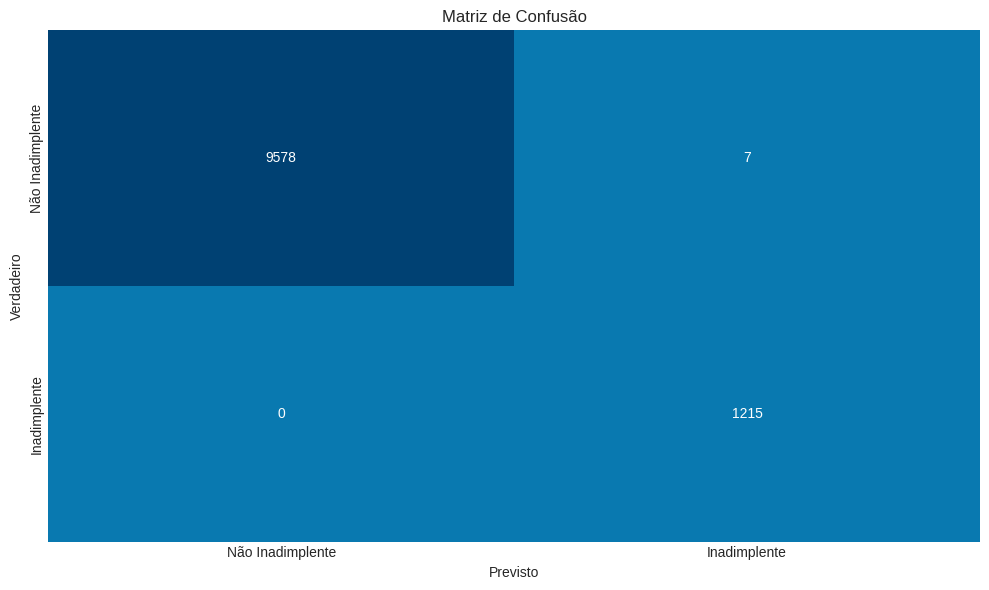

<ipython-input-132-7bfe5069dbdc>:74: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')  # Mudança de estilo para fundo azul celeste claro
<ipython-input-132-7bfe5069dbdc>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Coefficient", y="Feature", data=coefficients_score, palette=["#004173" if coef >= 0 else "#0979b0" for coef in coefficients_score['Coefficient']])


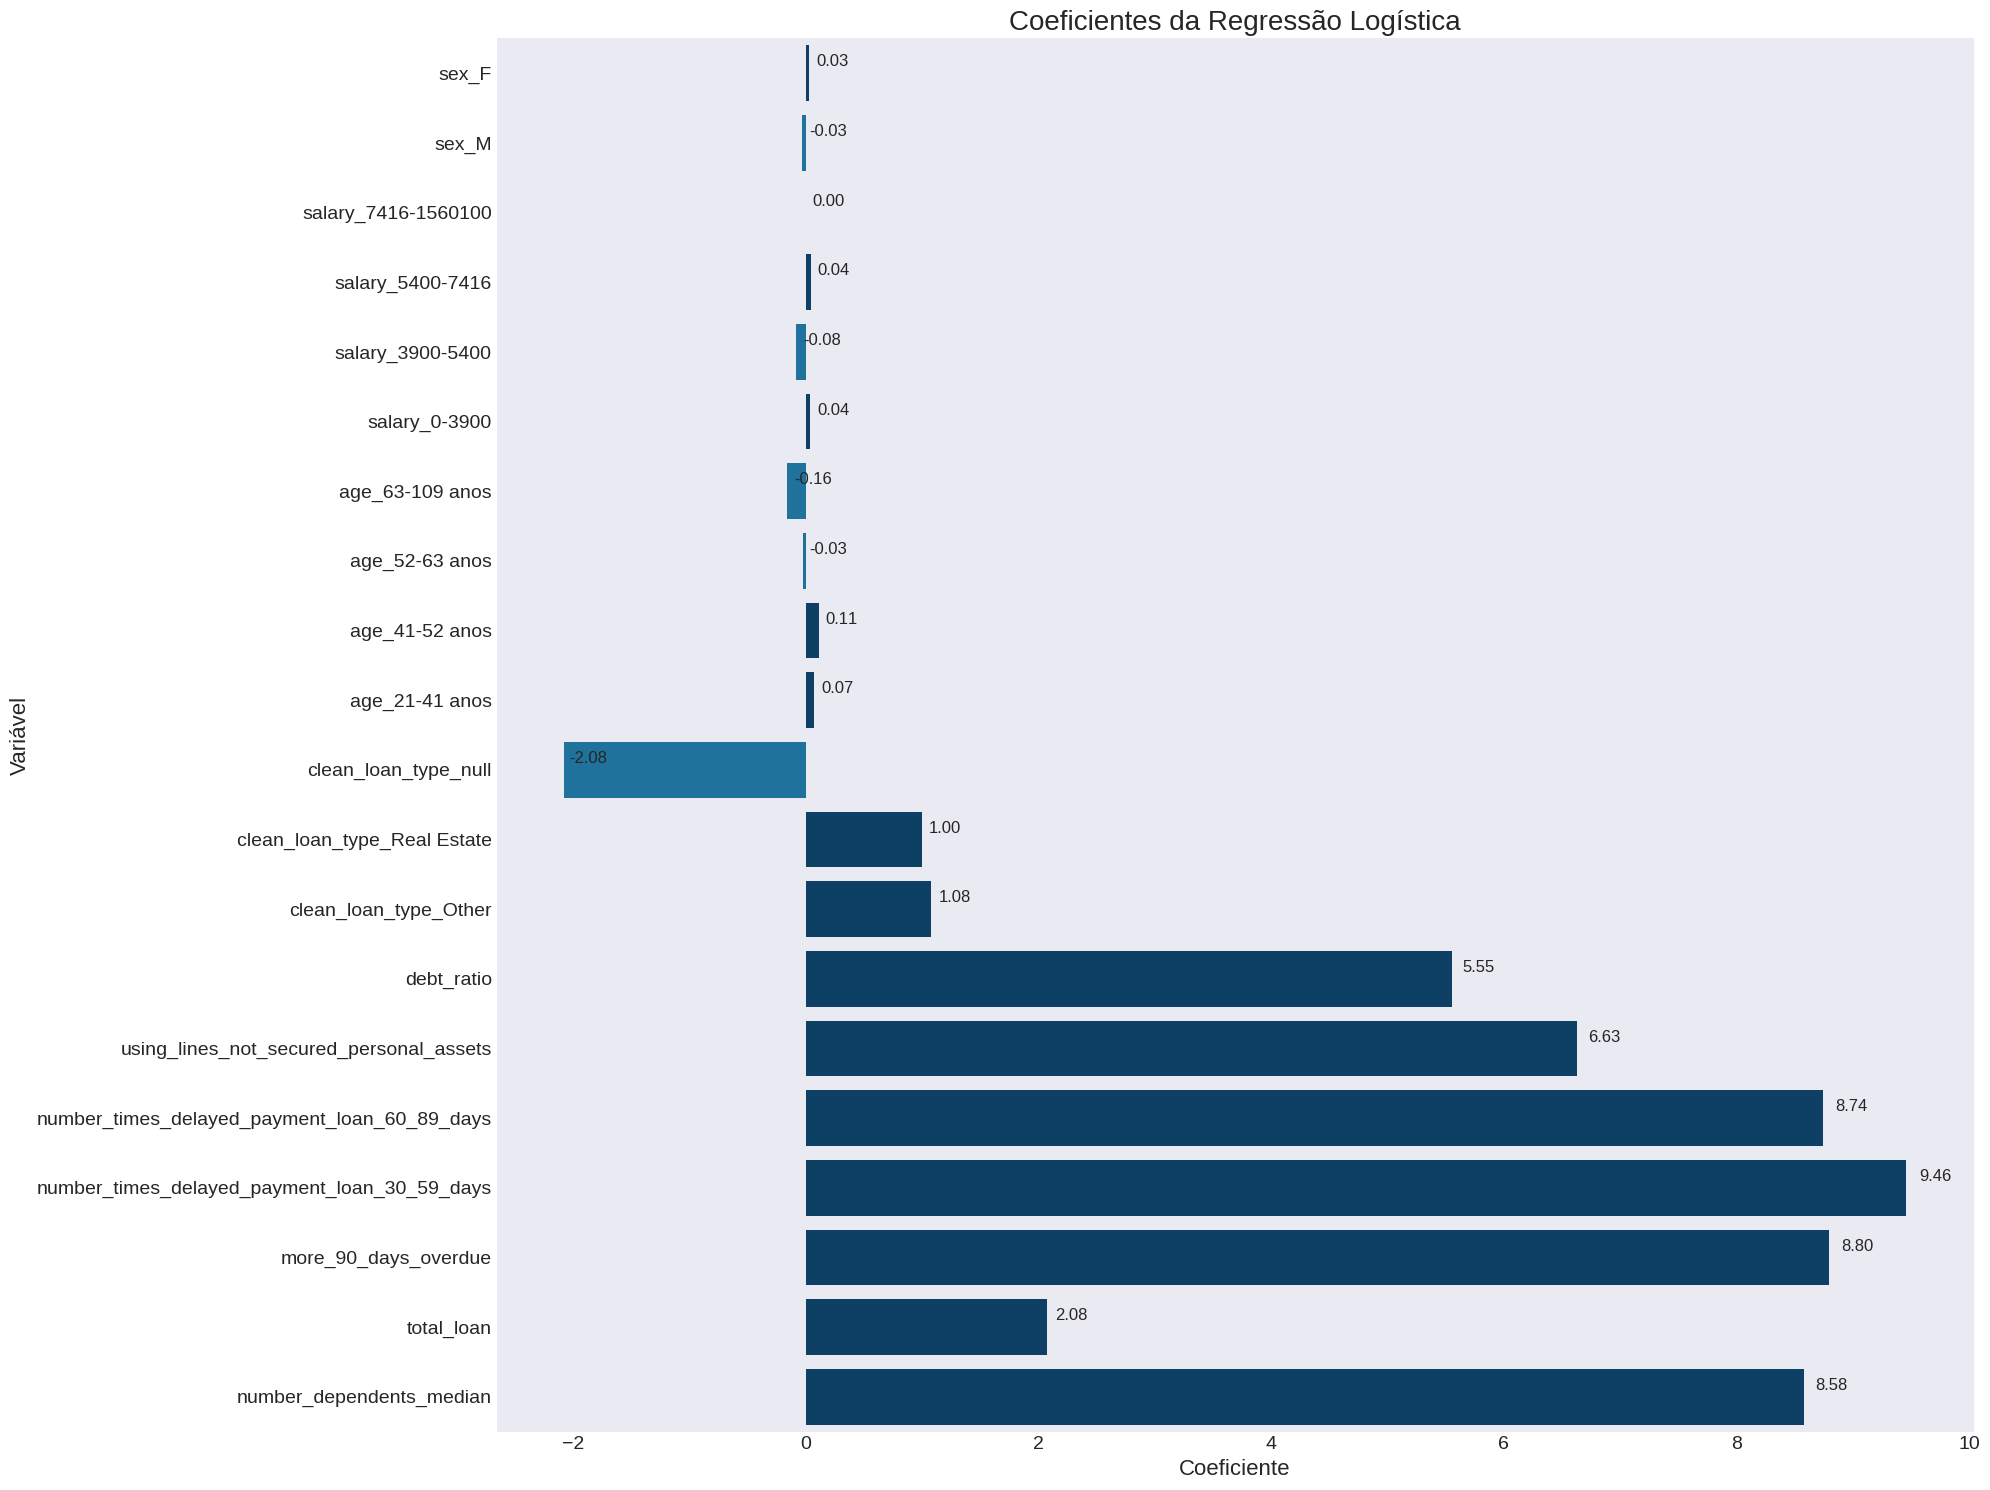

In [132]:
# Selecionando variáveis relevantes
features =  ['sex_F', 'sex_M', 'salary_7416-1560100', 'salary_5400-7416', 'salary_3900-5400', 'salary_0-3900', 'age_63-109 anos', 'age_52-63 anos',
            'age_41-52 anos', 'age_21-41 anos', 'clean_loan_type_null', 'clean_loan_type_Real Estate', 'clean_loan_type_Other', 'debt_ratio', 'using_lines_not_secured_personal_assets',
            'number_times_delayed_payment_loan_60_89_days', 'number_times_delayed_payment_loan_30_59_days', 'more_90_days_overdue', 'total_loan', 'number_dependents_median']
target = 'score'

# Criando o dataframe de treino e teste
X = df[features]
y = df[target]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando um pipeline com a normalização dos dados e o modelo de regressão logística
pipeline_score = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('clf', LogisticRegression())  # Modelo de regressão logística
])

# Definindo os parâmetros a serem testados
parameters_score = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'clf__penalty': ['l1', 'l2']  # Tipo de penalidade (L1 ou L2)
}

# Realizando a busca em grade com validação cruzada
grid_search_score = GridSearchCV(pipeline_score, parameters_score, cv=5, scoring='f1')

# Ajustando o modelo aos dados
grid_search.fit(X_train, y_train)

# Coeficientes do modelo
coefficients_score = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
print(coefficients_score)

# Melhores parâmetros encontrados
best_params_score = grid_search.best_params_
print("Melhores parâmetros encontrados:")
print(best_params_score)

# Melhor pontuação na validação cruzada
best_score = grid_search.best_score_
print("\nMelhor pontuação na validação cruzada (F1-score): {:.2f}".format(best_score))

# Avaliando o desempenho do modelo no conjunto de teste
best_model2 = grid_search.best_estimator_
y_pred_score = best_model2.predict(X_test)

# Relatório de classificação e matriz de confusão
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_score))
conf_matrix_score = confusion_matrix(y_test, y_pred_score)
print("\nMatriz de Confusão:")
print(conf_matrix_score)

# Definindo as cores personalizadas
colors_score = ["#0979b0", "#004173"]  # Azul médio para Inadimplente, azul escuro para Não Inadimplente

# Configurações do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_score, annot=True, fmt='d', cmap=sns.color_palette(colors_score), cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.xticks(ticks=[0.5, 1.5], labels=['Não Inadimplente', 'Inadimplente'])
plt.yticks(ticks=[0.5, 1.5], labels=['Não Inadimplente', 'Inadimplente'])
plt.tight_layout()  # Ajusta o layout para evitar que os rótulos se sobreponham
plt.show()

print('='*100)

# Definindo a cor de fundo
plt.figure(figsize=(20, 15))
plt.style.use('seaborn-dark')  # Mudança de estilo para fundo azul celeste claro
sns.set_palette(sns.color_palette(["#0979b0", "#004173"]))  # Paleta de cores azuis

# Plotando o gráfico de barras dos coeficientes
ax = sns.barplot(x="Coefficient", y="Feature", data=coefficients_score, palette=["#004173" if coef >= 0 else "#0979b0" for coef in coefficients_score['Coefficient']])
plt.title('Coeficientes da Regressão Logística', fontsize=20)  # Ajusta o tamanho do título
plt.xlabel('Coeficiente', fontsize=16)  # Ajusta o tamanho da etiqueta do eixo x
plt.ylabel('Variável', fontsize=16)  # Ajusta o tamanho da etiqueta do eixo y
plt.xticks(fontsize=14)  # Ajusta o tamanho das etiquetas do eixo x
plt.yticks(fontsize=14)  # Ajusta o tamanho das etiquetas do eixo y

# Adicionando etiquetas acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', ((p.get_width() * 1.005), p.get_y() + 0.5),
                xytext=(5, 10), textcoords='offset points', fontsize=12)

plt.tight_layout()  # Ajusta o layout para evitar que as etiquetas se sobreponham
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score

# Calculando a acurácia sem validação cruzada
best_model.fit(X_train, y_train)
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print("Acurácia sem validação cruzada:")
print("Acurácia no conjunto de treino:", train_accuracy)
print("Acurácia no conjunto de teste:", test_accuracy)

# Calculando a acurácia com validação cruzada
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print("\nAcurácia com validação cruzada (5 splits):")
for i, score in enumerate(cross_val_scores):
    print("Split {}: {:.2f}".format(i+1, score))

mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()

print("\nAcurácia média com validação cruzada (5 splits): {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))


Acurácia sem validação cruzada:
Acurácia no conjunto de treino: 0.9908333333333333
Acurácia no conjunto de teste: 0.9909259259259259

Acurácia com validação cruzada (5 splits):
Split 1: 0.99
Split 2: 0.99
Split 3: 0.99
Split 4: 0.99
Split 5: 0.99

Acurácia média com validação cruzada (5 splits): 0.99 +/- 0.00


<ipython-input-44-c81820905a99>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')  # Mudança de estilo para fundo azul celeste claro


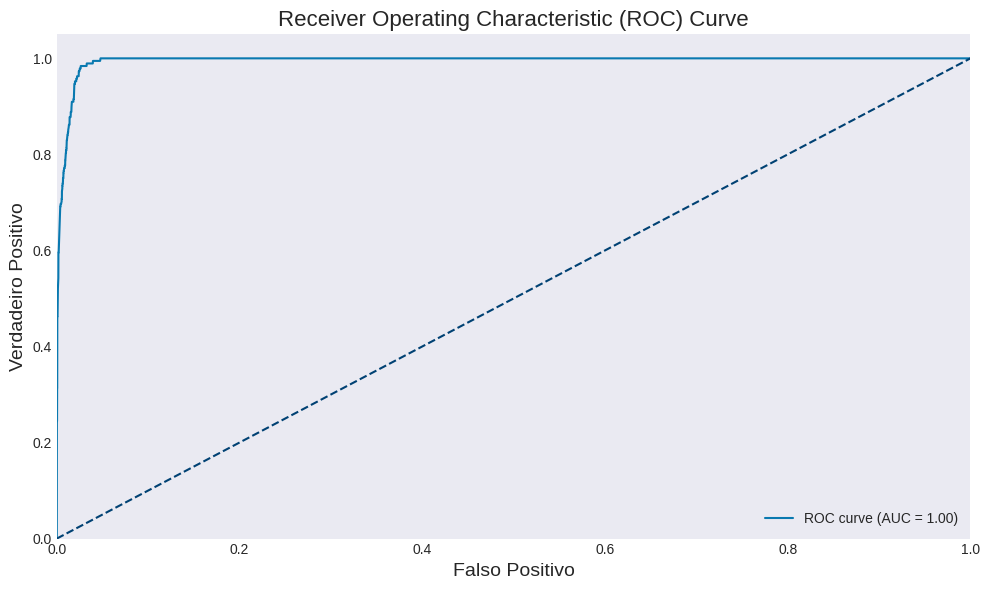

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Calculando as métricas
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-dark')  # Mudança de estilo para fundo azul celeste claro

# Plotando a curva ROC
plt.plot(fpr, tpr, color='#0979b0', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='#004173', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=14)  # Ajusta o tamanho da etiqueta do eixo x
plt.ylabel('Verdadeiro Positivo', fontsize=14)  # Ajusta o tamanho da etiqueta do eixo y
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)  # Ajusta o tamanho do título
plt.legend(loc="lower right")
plt.tight_layout()  # Ajusta o layout para evitar que as etiquetas se sobreponham

# Salvando a imagem
plt.savefig('roc_curve.png')
plt.show()


<ipython-input-45-cf2392b3486b>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')  # Mudança de estilo para um fundo azul celeste claro


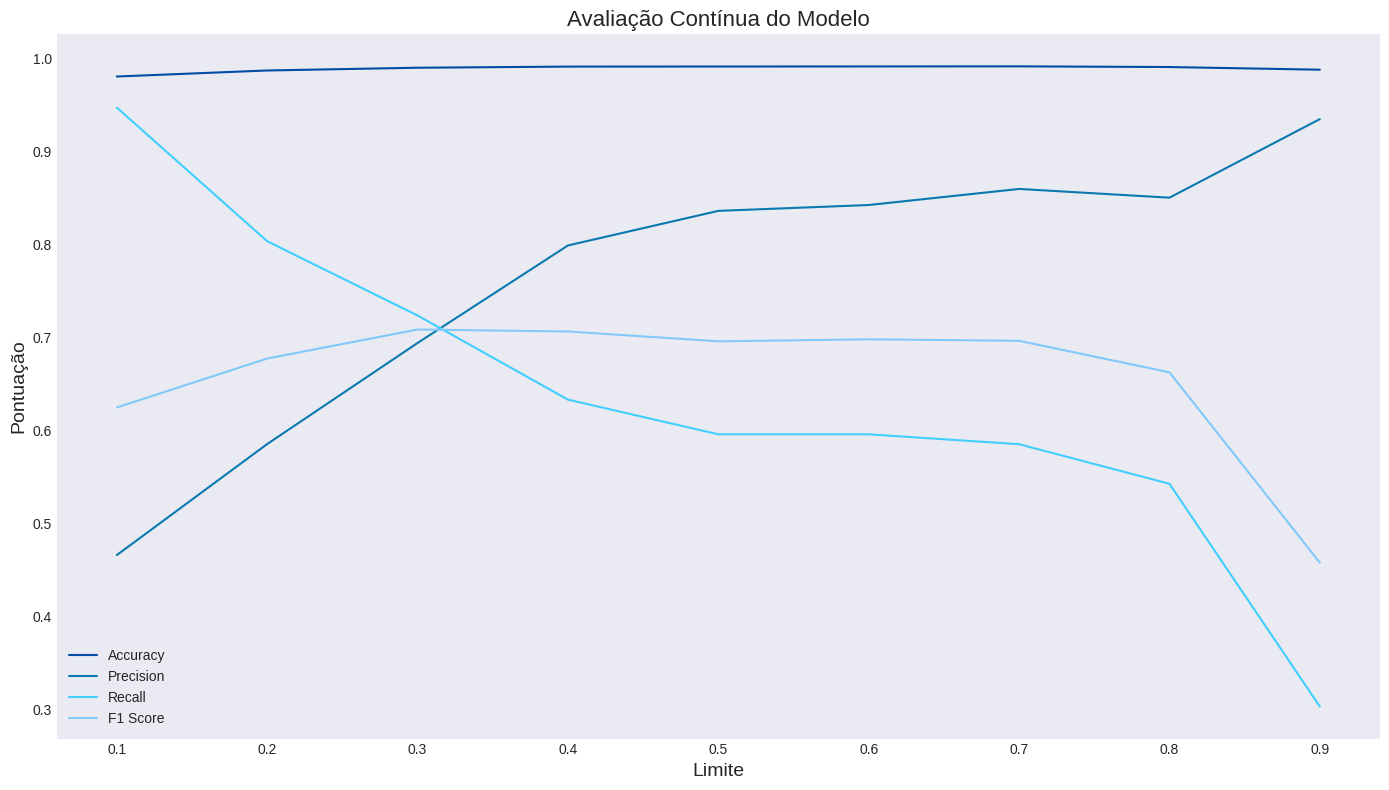

In [45]:
# Avaliação contínua com visualização
def evaluate_model(model, X, y, metric):
    evaluations = []
    for threshold in np.arange(0.1, 1, 0.1):
        y_pred = (best_model.predict_proba(X)[:, 1] >= threshold).astype(int)
        score = metric(y, y_pred)
        evaluations.append(score)
    return evaluations

# Avaliação contínua ao longo do tempo
metrics_to_evaluate = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

plt.figure(figsize=(14, 8))
plt.style.use('seaborn-dark')  # Mudança de estilo para um fundo azul celeste claro

# Definindo cores diferentes para cada métrica
colors = ['#004ca6', '#0979b0', '#40cfff', '#81c9fa']

# Plotando as métricas
for i, (metric_name, metric_func) in enumerate(metrics_to_evaluate.items()):
    scores = evaluate_model(best_model, X_test, y_test, metric_func)
    plt.plot(np.arange(0.1, 1, 0.1), scores, color=colors[i], label=metric_name)

plt.xlabel('Limite', fontsize=14)  # Ajusta o tamanho da etiqueta do eixo x
plt.ylabel('Pontuação', fontsize=14)  # Ajusta o tamanho da etiqueta do eixo y
plt.title('Avaliação Contínua do Modelo', fontsize=16)  # Ajusta o tamanho do título
plt.legend()
plt.grid(False)  # Removendo as linhas de grade
plt.tight_layout()  # Ajusta o layout para evitar que as etiquetas se sobreponham

# Salvando a imagem
plt.savefig('avaliacao.png')
plt.show()

<ipython-input-46-2b843ce999e5>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')  # Estilo com fundo azul celeste claro


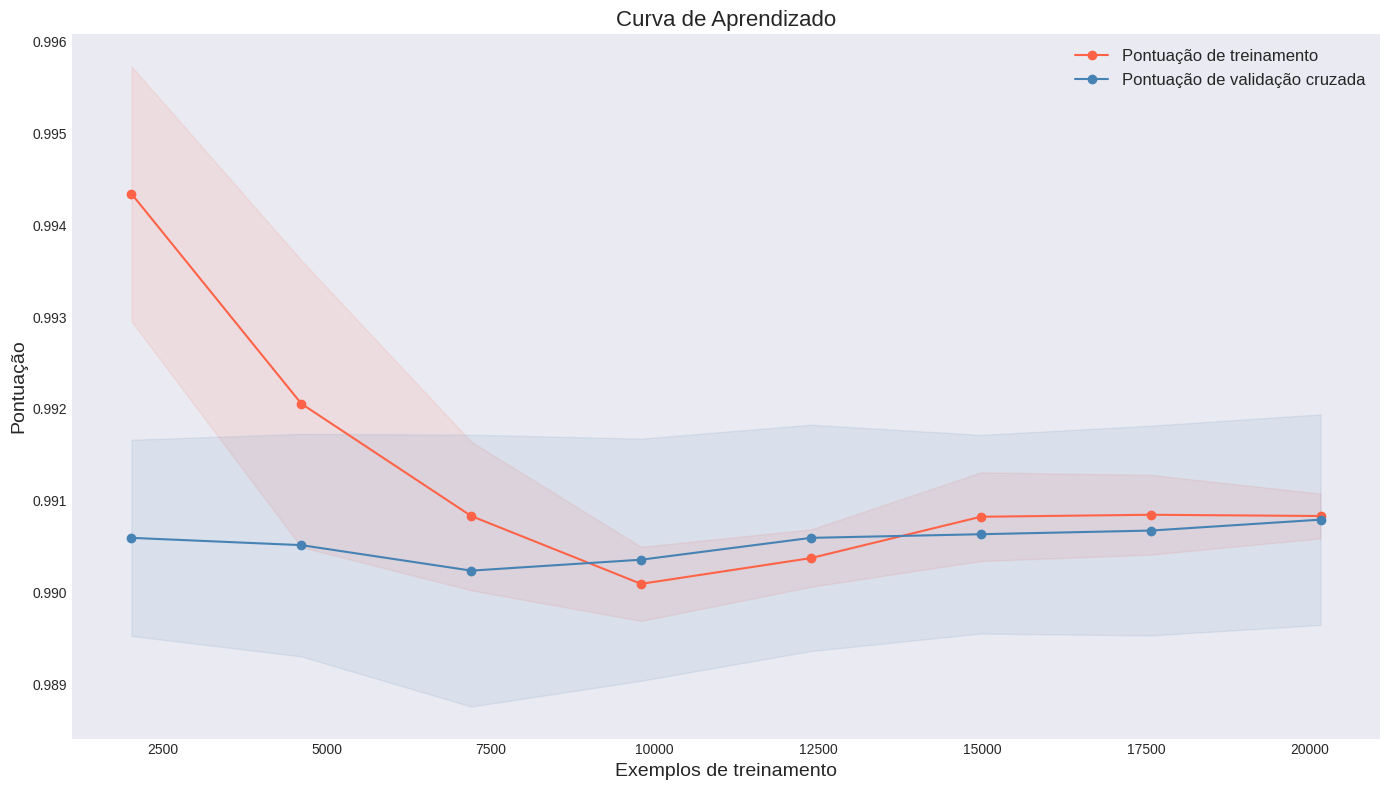

In [46]:
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 8)):
    plt.figure(figsize=(14, 8))
    plt.style.use('seaborn-dark')  # Estilo com fundo azul celeste claro
    plt.title(title, fontsize=16)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemplos de treinamento", fontsize=14)
    plt.ylabel("Pontuação", fontsize=14)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Preenchendo a área entre as curvas com diferentes cores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#FF6347")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#4682B4")

    # Plotando as linhas de pontuação
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#FF6347",
             label="Pontuação de treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#4682B4",
             label="Pontuação de validação cruzada")

    plt.legend(loc="best", fontsize=12)
    plt.grid(False)  # Removendo as linhas de grade
    plt.tight_layout()  # Ajusta o layout para evitar que as etiquetas se sobreponham
    return plt

# Plotando a curva de aprendizado
plot_learning_curve(best_model, "Curva de Aprendizado", X_train, y_train, cv=5, n_jobs=-1)

# Salvando a imagem
plt.savefig('aprendizado.png')
plt.show()


In [128]:
# Salvar o novo DataFrame em um arquivo CSV
df.to_csv('banco.csv', index=False)

In [175]:
df2 = pd.read_csv('/content/banco.csv')
df2

,user_id,sex,number_dependents_median,total_loan,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,using_lines_not_secured_personal_assets,debt_ratio,default_flag,...,salary_0-3900,salary_3900-5400,salary_5400-7416,salary_7416-1560100,sex_F,sex_M,age_quartile,salary_quartile,pontuacao,score
0,24483,M,0,0,1,1,1,1,0,0,...,0,1,0,0,0,1,21-41 anos,3900-5400,8,0
1,14999,F,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,21-41 anos,0-3900,5,0
2,18876,F,0,0,0,0,0,1,1,0,...,0,1,0,0,1,0,21-41 anos,3900-5400,6,0
3,28122,M,0,0,0,0,0,1,1,0,...,0,1,0,0,0,1,21-41 anos,3900-5400,6,0
4,865,M,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,21-41 anos,0-3900,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,1042,M,0,1,0,0,1,1,1,0,...,0,0,0,1,0,1,52-63 anos,7416-1560100,8,0
35996,30141,F,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,63-109 anos,7416-1560100,8,0
35997,30040,M,0,1,0,1,0,1,1,0,...,0,1,0,0,0,1,52-63 anos,3900-5400,8,0
35998,23773,F,0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,41-52 anos,7416-1560100,7,0


In [31]:
result_df.to_csv('risco.csv', index=False)

In [188]:
df3 = pd.read_csv('/content/risco.csv')
df3

,Feature,Riesgo Relativo,Coefficient
0,more_90_days_overdue,24.580225,1.061460
1,number_times_delayed_payment_loan_60_89_days,20.800091,0.806363
2,clean_loan_type_null,8.665459,0.052815
3,number_times_delayed_payment_loan_30_59_days,6.107946,1.210909
4,age_21-41 anos,1.834937,0.255743
5,salary_0-3900,1.586845,0.093746
6,clean_loan_type_Other,1.325966,0.085135
7,number_dependents_median,1.258172,0.104612
8,age_41-52 anos,1.173028,0.068117
9,sex_F,1.070238,0.032586


In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import learning_curve

# Calculando as métricas
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # Use probabilidades para calcular ROC AUC
conf_matrix = confusion_matrix(y_test, y_pred)
support = len(y_test)

# Calculando a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculando a média e o desvio padrão das pontuações de treino e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Creating the DataFrame
metrics_new = pd.DataFrame({
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'Support': [support],
    'Area Under ROC Curve': [roc_auc],
    'Confusion Matrix': [conf_matrix],
    'Train Sizes': [train_sizes],
    'Train Scores Mean': [train_scores_mean],
    'Train Scores Std': [train_scores_std],
    'Test Scores Mean': [test_scores_mean],
    'Test Scores Std': [test_scores_std]
})

# Displaying the DataFrame
metrics_new
metrics_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Accuracy              1 non-null      float64
 1   Recall                1 non-null      float64
 2   Precision             1 non-null      float64
 3   Support               1 non-null      int64  
 4   Area Under ROC Curve  1 non-null      float64
 5   Confusion Matrix      1 non-null      object 
 6   Train Sizes           1 non-null      object 
 7   Train Scores Mean     1 non-null      object 
 8   Train Scores Std      1 non-null      object 
 9   Test Scores Mean      1 non-null      object 
 10  Test Scores Std       1 non-null      object 
dtypes: float64(4), int64(1), object(6)
memory usage: 216.0+ bytes


In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import learning_curve

# Calculando as métricas
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # Use probabilidades para calcular ROC AUC
conf_matrix = confusion_matrix(y_test, y_pred)
support = len(y_test)

# Calculando a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculando a média e o desvio padrão das pontuações de treino e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Criando o DataFrame achatado
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1],
    'Support': [support],
    'ROC AUC': [roc_auc],
    'Confusion Matrix TN': [conf_matrix[0, 0]],
    'Confusion Matrix FP': [conf_matrix[0, 1]],
    'Confusion Matrix FN': [conf_matrix[1, 0]],
    'Confusion Matrix TP': [conf_matrix[1, 1]],
    'Train Size 1': [train_sizes[0]],
    'Train Size 2': [train_sizes[1]],
    'Train Size 3': [train_sizes[2]],
    'Train Size 4': [train_sizes[3]],
    'Train Size 5': [train_sizes[4]],
    'Train Score Mean 1': [train_scores_mean[0]],
    'Train Score Mean 2': [train_scores_mean[1]],
    'Train Score Mean 3': [train_scores_mean[2]],
    'Train Score Mean 4': [train_scores_mean[3]],
    'Train Score Mean 5': [train_scores_mean[4]],
    'Train Score Std 1': [train_scores_std[0]],
    'Train Score Std 2': [train_scores_std[1]],
    'Train Score Std 3': [train_scores_std[2]],
    'Train Score Std 4': [train_scores_std[3]],
    'Train Score Std 5': [train_scores_std[4]],
    'Test Score Mean 1': [test_scores_mean[0]],
    'Test Score Mean 2': [test_scores_mean[1]],
    'Test Score Mean 3': [test_scores_mean[2]],
    'Test Score Mean 4': [test_scores_mean[3]],
    'Test Score Mean 5': [test_scores_mean[4]],
    'Test Score Std 1': [test_scores_std[0]],
    'Test Score Std 2': [test_scores_std[1]],
    'Test Score Std 3': [test_scores_std[2]],
    'Test Score Std 4': [test_scores_std[3]],
    'Test Score Std 5': [test_scores_std[4]]
})

# Displaying the DataFrame
metrics_df
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accuracy             1 non-null      float64
 1   Recall               1 non-null      float64
 2   Precision            1 non-null      float64
 3   F1 Score             1 non-null      float64
 4   Support              1 non-null      int64  
 5   ROC AUC              1 non-null      float64
 6   Confusion Matrix TN  1 non-null      int64  
 7   Confusion Matrix FP  1 non-null      int64  
 8   Confusion Matrix FN  1 non-null      int64  
 9   Confusion Matrix TP  1 non-null      int64  
 10  Train Size 1         1 non-null      int64  
 11  Train Size 2         1 non-null      int64  
 12  Train Size 3         1 non-null      int64  
 13  Train Size 4         1 non-null      int64  
 14  Train Size 5         1 non-null      int64  
 15  Train Score Mean 1   1 non-null      float64

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn.model_selection import learning_curve

# Calculando as métricas
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)  # Use probabilidades para calcular ROC AUC
conf_matrix = confusion_matrix(y_test, y_pred)
support = len(y_test)

# Calculando a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculando a média e o desvio padrão das pontuações de treino e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Criando o DataFrame achatado
metrics_df2 = pd.DataFrame({
    'Accuracy': [accuracy],
    'Recall': [recall],
    'Precision': [precision],
    'F1 Score': [f1],
    'Support': [support],
    'ROC AUC': [roc_auc],
    'Confusion Matrix TN': [conf_matrix[0, 0]],
    'Confusion Matrix FP': [conf_matrix[0, 1]],
    'Confusion Matrix FN': [conf_matrix[1, 0]],
    'Confusion Matrix TP': [conf_matrix[1, 1]],
    'Train Size 1': [train_sizes[0]],
    'Train Size 2': [train_sizes[1]],
    'Train Size 3': [train_sizes[2]],
    'Train Size 4': [train_sizes[3]],
    'Train Size 5': [train_sizes[4]],
    'Train Score Mean 1': [train_scores_mean[0]],
    'Train Score Mean 2': [train_scores_mean[1]],
    'Train Score Mean 3': [train_scores_mean[2]],
    'Train Score Mean 4': [train_scores_mean[3]],
    'Train Score Mean 5': [train_scores_mean[4]],
    'Train Score Std 1': [train_scores_std[0]],
    'Train Score Std 2': [train_scores_std[1]],
    'Train Score Std 3': [train_scores_std[2]],
    'Train Score Std 4': [train_scores_std[3]],
    'Train Score Std 5': [train_scores_std[4]],
    'Test Score Mean 1': [test_scores_mean[0]],
    'Test Score Mean 2': [test_scores_mean[1]],
    'Test Score Mean 3': [test_scores_mean[2]],
    'Test Score Mean 4': [test_scores_mean[3]],
    'Test Score Mean 5': [test_scores_mean[4]],
    'Test Score Std 1': [test_scores_std[0]],
    'Test Score Std 2': [test_scores_std[1]],
    'Test Score Std 3': [test_scores_std[2]],
    'Test Score Std 4': [test_scores_std[3]],
    'Test Score Std 5': [test_scores_std[4]],
    'ROC Curve FPR': [fpr],  # Convertendo arrays para strings
    'ROC Curve TPR': [tpr]
})

# Exibindo o DataFrame
metrics_df2
#metrics_df2.info()


,Accuracy,Recall,Precision,F1 Score,Support,ROC AUC,Confusion Matrix TN,Confusion Matrix FP,Confusion Matrix FN,Confusion Matrix TP,...,Test Score Mean 3,Test Score Mean 4,Test Score Mean 5,Test Score Std 1,Test Score Std 2,Test Score Std 3,Test Score Std 4,Test Score Std 5,ROC Curve FPR,ROC Curve TPR
0,0.990926,0.595745,0.835821,0.695652,10800,0.995036,10590,22,76,112,...,0.990595,0.990635,0.990794,0.001069,0.001187,0.001188,0.001082,0.001147,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.005319148936170213, 0.0159574468085106..."


In [43]:
metrics_df.to_csv('matriz_dummy.csv', index=False)

In [37]:
df4 = pd.read_csv('/content/matriz_dummy.csv')
df4

,Accuracy,Recall,Precision,Support,ROC AUC,Confusion Matrix TN,Confusion Matrix FP,Confusion Matrix FN,Confusion Matrix TP,Train Size 1,...,Test Score Mean 1,Test Score Mean 2,Test Score Mean 3,Test Score Mean 4,Test Score Mean 5,Test Score Std 1,Test Score Std 2,Test Score Std 3,Test Score Std 4,Test Score Std 5
0,0.990926,0.595745,0.835821,10800,0.995036,10590,22,76,112,2016,...,0.990595,0.990635,0.990595,0.990635,0.990794,0.001069,0.001187,0.001188,0.001082,0.001147
